# Introduction

The object of this project is to create a simple anti-spam detector for text messages.  
The data that is being used for training and testing comes from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection).  
The file contains over 5000 text messages.

In [52]:
#Firstly, let's import some packages
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Now, let's see how big the data exactly is and how it looks like
messages = [line.rstrip() for line in open('SMS_Data/SMSSpamCollection')]
print(len(messages))

5574


In [3]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

In [7]:
#As we can see, this look like a TSV file with two columns. First one is a label, telling whether the message is a spam or a normal text ('ham'). Second is a message itself.
#Let's read the file using pandas
messages = pd.read_csv('SMS_Data/SMSSpamCollection', sep='\t', names=['label', 'message'])
messages.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Exploratory Data Analysys

In [11]:
#Let's see how the length of the message corresponds with the label category

#adding the length column
messages['length'] = messages['message'].apply(len)

In [80]:
#average length, shortest and longest messages
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

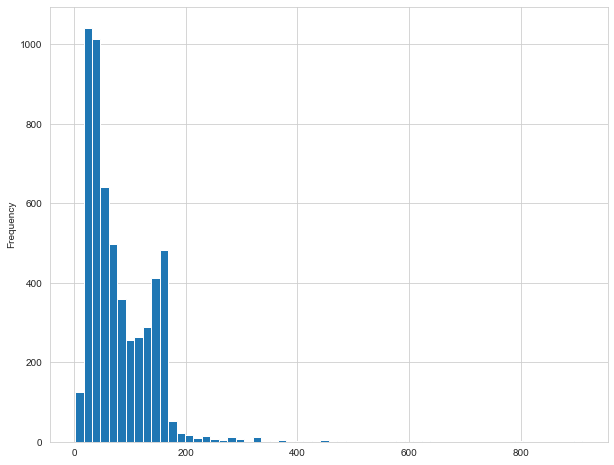

In [76]:
#Looks like there are two local peaks, one around 50 and one around 150 words 
messages['length'].plot(bins=60, kind='hist');

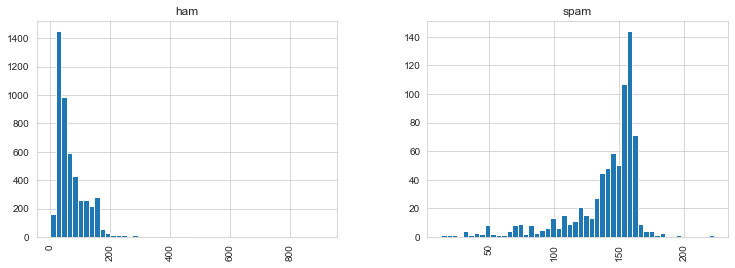

In [78]:
#It seems that spam messages tend to be longer than normal ones
messages.hist(column='length', by='label', bins=50,figsize=(12,4));